<a href="https://colab.research.google.com/github/zomorodiyan/MAE-5093/blob/main/MAE5093_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Homework 3** of the course **MAE-5093** Fall 2021, questions **1, 2, 3, 4, 6, 16, 20, 26** from 4th chapter of **Fundamentals of Engineering Numerical Analysis** Second Edition

<h2>by Mehrdad Zomorodiyan<h2>

link to the questions: https://drive.google.com/file/d/1z3sAHGyw1Clt9ffNpoxwag7l8WkCIcFA/view?usp=sharing 

In [83]:
import numpy as np
import matplotlib.pyplot as plt

<h1>question 1<h1>

solve $y'=-(2+\frac{x^2}{100})y$ using different methods

exact solution: $y = \frac{1 + 3x + 3x^2 + x^3}{e^x}$

In [84]:
#define numerical steps
def alpha(xi):
    return 3*xi/(1+xi)
def beta(xi):
    return 2*(1+xi)**3*np.exp(-xi)
def step(name,xi,yi,dx):
    if name=='Euler':
        yp = -(2+0.01*xi**2)*yi
        return yi + dx*yp
    if name=='BackEuler':
        return yi/(1+dx*(2+0.01*xi**2))
    if name=='Trapezoidal':
        return (yi - dx/2*(2+0.01*xi**2)*yi) / (1+dx/2*(2+0.01*(xi+dx)**2))
    if name=='RK2':
        yhalf = yi - dx/2*(2+0.01*xi**2)*yi
        return yi - dx*(2+0.01*(xi+dx/2)**2)*yhalf
    if name=='RK4':
        k1 = -dx*(2+0.01*xi**2)*yi
        k2 = -dx*(2+0.01*(xi+dx/2)**2)*(yi+k1/2)
        k3 = -dx*(2+0.01*(xi+dx/2)**2)*(yi+k2/2)
        k4 = -dx*(2+0.01*(xi+dx)**2)*(yi+k3)
        return yi + 1/6*k1 + 1/3*(k2+k3) + 1/6*k4

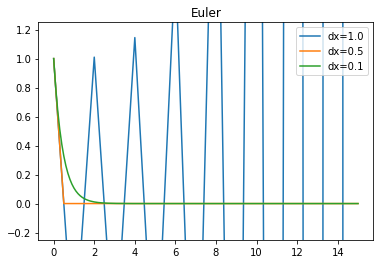

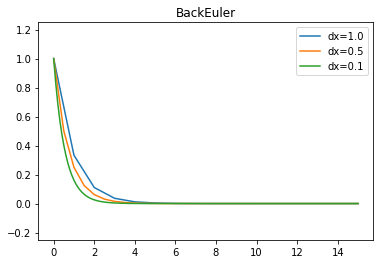

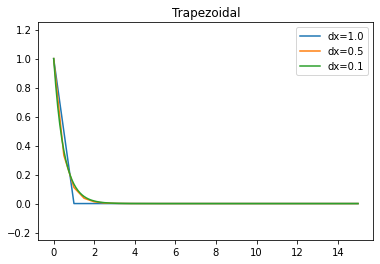

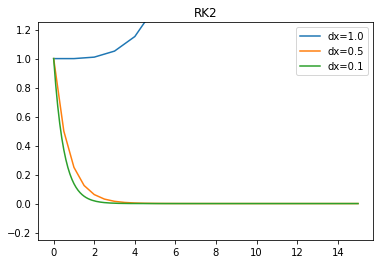

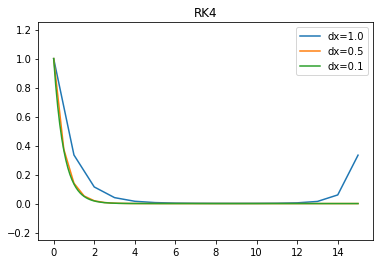

In [85]:
#define and use solve
def solve(name,start,finish):
    names= ['Euler','BackEuler','Trapezoidal','RK2','RK4']
    if not(name in names):
       raise ValueError("unvalid method name!")
    dxz = [1.0,0.5,0.1]
    start = 0; finish = 15
    for dx in dxz:
        n = int((finish-start)/dx)+1
        x = np.linspace(0,15,n)
        y = np.full_like(x, 1)
        yp = np.full_like(x, 0)
        for i in range(n-1):
            y[i+1] = step(name,x[i],y[i],dx)
        plt.plot(x,y)
    plt.legend(['dx=1.0', 'dx=0.5', 'dx=0.1'])
    plt.gca().set_ylim([-0.25,1.25])
    plt.title(name)
plt.figure()
solve('Euler',0,15)
plt.figure()
solve('BackEuler',0,15)
plt.figure()
solve('Trapezoidal',0,15)
plt.figure()
solve('RK2',0,15)
plt.figure()
solve('RK4',0,15)

<h1> question 2 <h1>

<h2>(a)<h2>

exact solution: $y = \frac{1}{\frac{100}{101}sin(2x)-\frac{10}{101}cos(2x)+\frac{111}{101}e^{0.2x}}$


Text(0.5, 1.0, 'Euler')

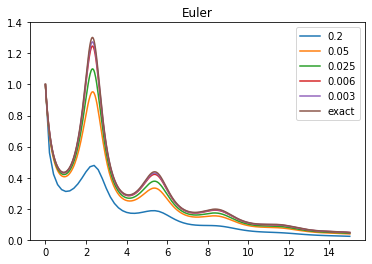

In [86]:
#(b) numerical solution
import numpy as np
import matplotlib.pyplot as plt
dxz = [0.2,0.05,0.025,0.006,0.003]
name = 'Euler'
for dx in dxz:
    start = 0; finish = 15
    n = int((finish-start)/dx)+1
    x = np.linspace(start,finish,n)
    y = np.full_like(x, 1)
    yp = np.full_like(x, 0)
    for i in range(n-1):
        yp[i] = -0.2*y[i]-2*np.cos(2*x[i])*y[i]**2
        y[i+1] = y[i] + dx*yp[i]
    plt.plot(x,y)
y = 1 / (100/101*np.sin(2*x)-10/101*np.cos(2*x)+111/101*np.exp(0.2*x))
plt.plot(x,y)

plt.legend(['0.2','0.05','0.025','0.006','0.003','exact'])
plt.gca().set_ylim([0.0,1.4])
plt.title(name)

<h2>(c)<h2>

there is little difference between solution for timesteps=0.006 & 0.003 so 0.006 is small enough.

<h1> question 3 <h1>

$y_{n+1} = y_n + hy'_n + \frac{h^2}{2!}y''_n + O(h^3)$

$\implies y_{n+1} = y_n + hf_n + \frac{h^2}{2!}(\frac{f_n-f_{n-1}}{h}+O(h)) + O(h^3)$

$\implies y_{n+1} = y_n + \frac{3h}{2}f_n - \frac{1}{2}f_n + O(h^3)$

$\implies\frac{3h}{2}f_n - \frac{1}{2}f_n = \frac{y_{n+1} - y_n}{h}  + O(h^2)\implies$ 2nd order

$y_{n+1} = y_n + \frac{3h}{2}\lambda y_n - \frac{h}{2}\lambda y_{n-1}$

$\implies y_{n+1} - y_n(1 + \frac{3h\lambda}{2}) + \frac{h\lambda}{2} y_{n-1}= 0$

$y_n=\sigma^n y_0 \implies\sigma^{n+1}y_0 - \sigma^n y_0(1+\frac{3h\lambda}{2}) + \frac{h\lambda}{2}\sigma y_0$

$\sigma ≠ 0 \implies\sigma^2 - (1+\frac{3h\lambda}{2})\sigma + \frac{h\lambda}{2} = 0$ 

$\sigma_{1,2} = \frac{1+\frac{3h\lambda}{2}\pm \sqrt{(1+\frac{3h\lambda}{2})^2-2h\lambda}}{2}=\frac{1+\frac{3h\lambda}{2}\pm \sqrt{1+h\lambda+\frac{9}{4}h^2\lambda^2}}{2}$

Text(0, 0.5, 'h*lambda_imag')

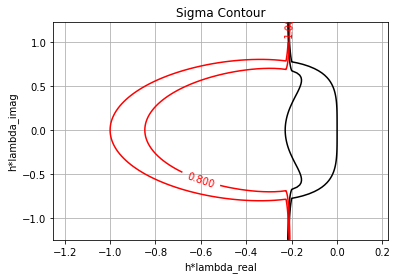

In [87]:
#draw sigma contours for 1 and $c<1$
import matplotlib.pyplot as plt
delta = 0.025
xplot = np.arange(-1.25, 0.25, delta)
yplot = np.arange(-1.25, 1.25, delta)
X, Y = np.meshgrid(xplot, yplot)
sigma1 = np.abs(1/2*(1 + 3*(X+Y*1j)/2+np.sqrt(1+X+Y*1j+9/4*(X+Y*1j)**2)))
sigma2 = np.abs(1/2*(1 + 3*(X+Y*1j)/2-np.sqrt(1+X+Y*1j+9/4*(X+Y*1j)**2)))
fig, ax = plt.subplots()
c = 0.8
CS = ax.contour(X, Y, sigma1, [c,1.0], colors=('black','black'))
CS = ax.contour(X, Y, sigma2, [c,1.0], colors=('red','red'))
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Sigma Contour')
ax.xaxis.grid(True, zorder=0)
ax.yaxis.grid(True, zorder=0)
ax.set_xlabel('h*lambda_real')
ax.set_ylabel('h*lambda_imag')

figure above $\implies -1<h\lambda<0 \mid \lambda \in  \mathbb{R} $  

<h1> question 4 <h1>

$y_n = c_1\sigma_1^n + c_2 \sigma_2^n$

$n=0 \implies y_0 = c_1 + c_2$

$n=1 \implies y_1 = c_1\sigma_1 + c_2\sigma_2$

$c_1 = -c_2 + y_0 \implies y_1 = (-c_2+y_0)\sigma_1 + c_2\sigma_2$

$c_2 = \frac{y_1 - \sigma y_0}{\sigma_2 - \sigma_1}$

$y1 = y0 +hf + \frac{h^2}{2}y''_0$

$\sigma_1 = \lambda h + \sqrt{\lambda^2h^2+1},$
$\sigma_1 = \lambda h - \sqrt{\lambda^2h^2+1}$

$c_2 = \frac{y_0  + hf_0 + \frac{h^2}{2}y''_0-(\lambda h + \sqrt{\lambda^2h^2+1})}{-2\sqrt{\lambda^2h^2+1}}$

$\implies c_2 = \frac{\frac{h^2}{2}(y''_0-h^2)}{-2(1+\frac{\lambda^2h^2}{2}+ O(h^4))} \implies c_2$ is $2nd$ order

$c_1 = \frac{\frac{h^2}{2}y''_0 + 2y_0  + \frac{h^2}{2}y_0 + O(h^4)}{2(1+\frac{\lambda^2h^2}{2}+ O(h^4)})\implies c_1$ is $0th$ order


<h1> question 5 <h1>

$y_{i+\frac{1}{2}}=y_i + \frac{h}{2}y'_i + \frac{\frac{h^2}{2^2}}{2!}y''_i$

$y_{i+1}=y_{i+\frac{1}{2}} + \frac{h}{2}y'_{i+\frac{1}{2}} + \frac{\frac{h^2}{2^2}}{2!}y''_{i+\frac{1}{2}}$

$y_{i+1}=y_{i}+\frac{h}{2}y'_{i}+\frac{h^2}{8}y''_{i} + \frac{h}{2}(y'_{i}+\frac{h}{2}y''_{i}+\frac{h^2}{8}y'''_{i}) + \frac{h^2}{8}y'_{i+\frac{1}{2}}$

$y_{i+1} = y_k + h(\frac{y'_i}{2}+\frac{y'_i}{2})+h^2(\frac{y''_i}{8}+\frac{y''_i}{4}+\frac{y''_{i+\frac{1}{2}}}{8})$

$y'_i = f_i = \frac{y_{i+1}-y_i}{h}- h(\frac{3y'_i}{8}+\frac{y''_{i+\frac{1}{2}}}{8})\implies$ answer is $1st$ order

the answer does not depend on the nature of right hand side.

<h1> question 6 <h1>

In [88]:
#define steps
def alpha(xi):
    return 3*xi/(1+xi)
def beta(xi):
    return 2*(1+xi)**3*np.exp(-xi)
def step(name,xi,yi,dx):
    if name=='Euler':
        yp=-alpha(xi)*yi + beta(xi)
        return yi+dx*yp
    if name=='BackEuler':
        return (yi+beta(xi+dx)*dx)/(1+dx*alpha(xi+dx))
    if name=='Trapezoidal':
        return (yi + dx/2*(-alpha(xi)*yi+beta(xi)+beta(xi+dx)))\
                        /(1+dx/2*alpha(xi+dx))
    if name=='RK2':
        yhalf = yi+dx/2*(-alpha(xi)*yi+beta(xi))
        return y[i] + dx*(-alpha(xi+dx/2)*yhalf+beta(xi+dx/2))
    if name=='RK4':
        k1 = dx*(-alpha(xi)*yi+beta(xi))
        k2 = dx*(-alpha(xi+dx/2)*(yi+k1/2)+beta(xi+dx/2))
        k3 = dx*(-alpha(xi+dx/2)*(yi+k2/2)+beta(xi+dx/2))
        k4 = dx*(-alpha(xi+dx)*(yi+k3)+beta(xi+dx))
        return  yi + 1/6*k1 + 1/3*(k2+k3) + 1/6*k4

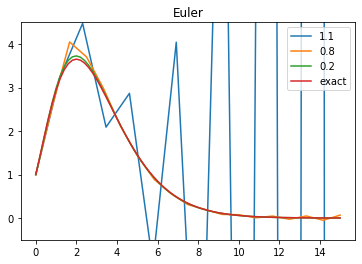

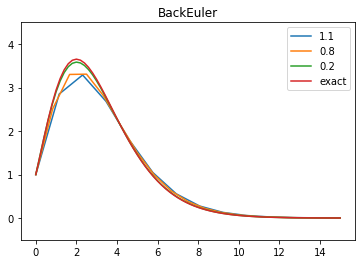

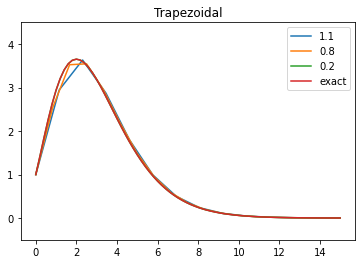

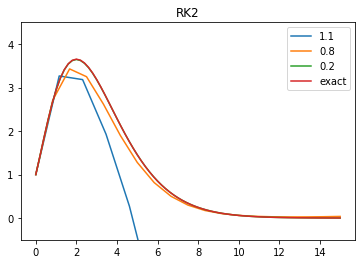

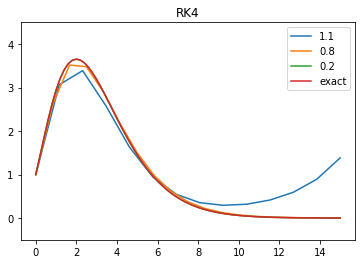

In [89]:
#use steps and plot
dxz = [1.1,0.8,0.2]
names = ['Euler','BackEuler','Trapezoidal','RK2','RK4']
start = 0; finish = 15

for name in names:
    plt.figure()
    for dx in dxz:
        n = int((finish-start)/dx)+1
        x = np.linspace(0,15,n)
        y = np.full_like(x, 1)
        yp = np.full_like(x, 0)
        for i in range(n-1):
            y[i+1] = step(name,x[i],y[i],dx)
        plt.plot(x,y)
        plt.gca().set_ylim([-0.5,4.5])
    y = (1 + 3*x + 3*x**2 + x**3) / np.exp(x)
    plt.gca().set_ylim([-0.5,4.5])
    plt.plot(x,y)
    plt.title(name)
    plt.legend(['1.1','0.8','0.2','exact'])

<h1> question 16 <h1>

In [90]:
#import, define plot, define step
import numpy as np
import time
import matplotlib.pyplot as plt
import imageio
import os

sigma = 10.0; b = 8/3 # r: control parameter, r>24.74 => kaotic
#ODEz: x'=sigma*(y-x), y'=rx-y-xz, z'=xy-bz

def plot(par1,par2,par3,name1,name2,name3,part):
    plt.figure()
    plt.plot(par1,par2); plt.plot(par1,par3)
    plt.legend([name2, name3])
    plt.title(name2+' and '+name3+' for differnet '+name1)

def plotc(par1,par2,t,name):
    plt.figure()
    plt.plot(t,par1); plt.plot(t,par2); plt.legend([name+'1',name+'2'])
    plt.title(name+' evolutions in time')

def step(xi,yi,zi,dt):
    k1x = dt*sigma*(yi-xi)
    k1y = dt*(r*xi-yi-xi*zi)
    k1z = dt*(xi*yi-b*zi)
    k2x = dt*sigma*((yi+k1y/2)-(xi+k1x/2))
    k2y = dt*(r*(xi+k1x/2)-(yi+k1y/2)-(xi+k1x/2)*(zi+k1z/2))
    k2z = dt*((xi+k1x/2)*(yi+k1y/2)-b*(zi+k1z/2))
    k3x = dt*sigma*((yi+k2y/2)-(xi+k2x/2))
    k3y = dt*(r*(xi+k2x/2)-(yi+k2y/2)-(xi+k2x/2)*(zi+k2z/2))
    k3z = dt*((xi+k2x/2)*(yi+k2y/2)-b*(zi+k2z/2))
    k4x = dt*sigma*((yi+k3y)-(xi+k3x))
    k4y = dt*(r*(xi+k3x)-(yi+k3y)-(xi+k3x)*(zi+k3z))
    k4z = dt*((xi+k3x)*(yi+k3y)-b*(zi+k3z))
    return [xi + 1/6*k1x + 1/3*(k2x+k3x) + 1/6*k4x\
           ,yi + 1/6*k1y + 1/3*(k2y+k3y) + 1/6*k4y\
           ,zi + 1/6*k1z + 1/3*(k2z+k3z) + 1/6*k4z]

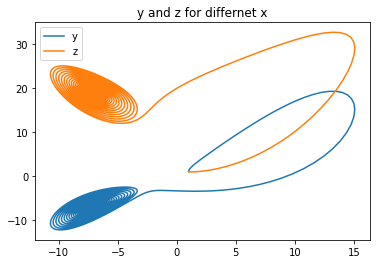

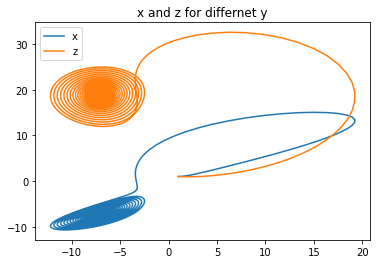

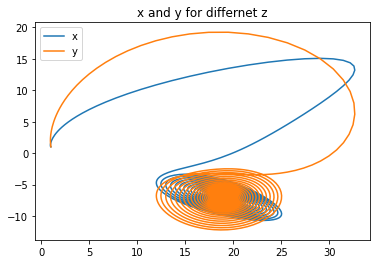

In [91]:
start = 0; finish = 25
dt = 0.01
n = int((finish-start)/dt)+1
x = np.empty(n); y = np.empty(n); z = np.empty(n)
t = np.linspace(0,25,n)
#(a) $ 0 \leq t \leq 25$
r = 20; x[0],y[0],z[0]= [1,1,1]

for i in range(n-1):
    x[i+1],y[i+1],z[i+1] = step(x[i],y[i],z[i],dt)
plot(x,y,z,'x','y','z','16-a')
plot(y,x,z,'y','x','z','16-a')
plot(z,x,y,'z','x','y','16-a')



  

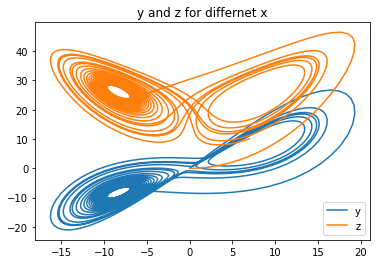

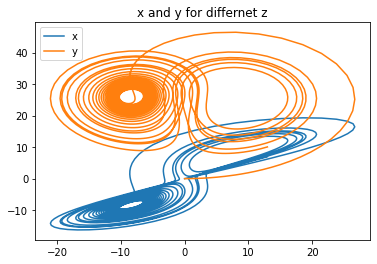

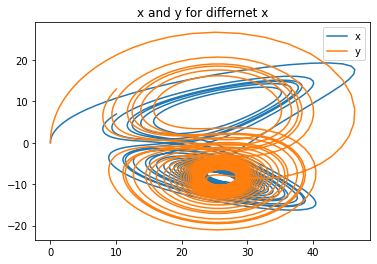

In [92]:
#(b)
r = 27.00; x[0],y[0],z[0]= [0.01,0.01,0.01]
for i in range(n-1):
    x[i+1],y[i+1],z[i+1] = step(x[i],y[i],z[i],dt)
plot(x,y,z,'x','y','z','16-b')
plot(y,x,z,'z','x','y','16-b')
plot(z,x,y,'x','x','y','16-b')



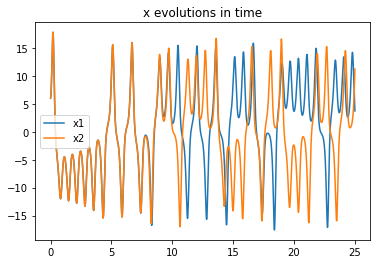

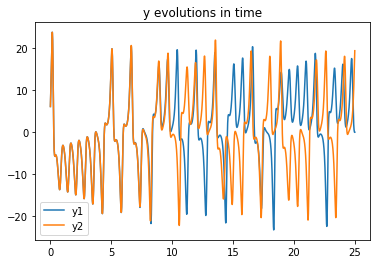

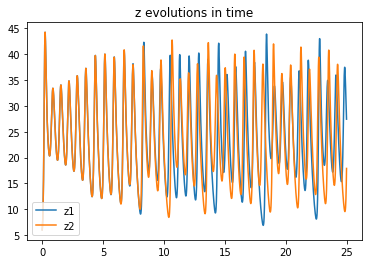

In [93]:
#(c) compare trajectory in time for two nearby initial conditions
r=28
x[0],y[0],z[0] = [6,6,6]
for i in range(n-1):
    x[i+1],y[i+1],z[i+1] = step(x[i],y[i],z[i],dt)
x2 = np.copy(x); y2 = np.copy(y); z2 = np.copy(z)

x2[0],y2[0],z2[0] = [6,6.01,6]
for i in range(n-1):
    x2[i+1],y2[i+1],z2[i+1] = step(x2[i],y2[i],z2[i],dt)
plotc(x,x2,t,'x'); plotc(y,y2,t,'y'); plotc(z,z2,t,'z')

In [94]:
#Data for three-dimensional scattered points
plt.ioff()
npoints = 201
tz = np.linspace(0,1,npoints)*n
filenames = []
for i in range(npoints-1):
    ax = plt.axes(projection='3d')
    ax.plot3D(x[:int(tz[i])], y[:int(tz[i])], z[:int(tz[i])], color=(0.8,0.3,0.3))
    ax.plot3D(x2[:int(tz[i])], y2[:int(tz[i])], z2[:int(tz[i])], color=(0.3,0.3,0.8))
    ax.scatter3D(x[int(tz[i])], y[int(tz[i])], z[int(tz[i])],
            color=(0.7,0.0,0.3), s=40)
    ax.scatter3D(x2[int(tz[i])], y2[int(tz[i])], z2[int(tz[i])],
            color=(0.0,0.3,0.7), s=40)
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.text2D(0.05, 0.85, "Lorenz", transform=ax.transAxes)
    ax.legend(['initial: (6,6,6)', 'initial: (6,6.01,6)'])
    #plt.show()
    filename = 'plot/gif/'+str(i)+'.png'
    ax.axes.set_xlim3d(left=-20, right=18)
    ax.axes.set_ylim3d(bottom=-25, top=25)
    ax.axes.set_zlim3d(bottom=0, top=38)


    isExist = os.path.exists('plot/gif/')
    if not isExist:
      # Create a new directory because it does not exist 
      os.makedirs('plot/gif/')
      print("plot/gif is created!")

    plt.savefig(filename)
    if(i%10==0):
      print('.',end='')

    plt.close()
    filenames.append(filename)

....................

In [95]:
#build gif and remove files
with imageio.get_writer('16-c.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
for filename in set(filenames):
    os.remove(filename)

In [97]:
from google.colab import files   # file download
files.download('16-c.gif')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<h1> question 20 <h1>

(a) Runge-Kutta 3rd order

(b)

$y_{n+1} = y_n + \gamma_1hf(y_n + \gamma_1hf(y_n)) + \omega_2hf(y_n) + \gamma_3hf(y_n + \gamma_1hf(yn) + \gamma_2hf(y_n+\gamma_1hf(yn)) + \omega_2hf(y_n)) + \omega_3hf(y_n + \gamma_1hf(y_n)) $

$ = y_n + (\gamma_1 + \gamma_2 + \omega_2+\gamma_3+\omega_3)hy' + (\gamma_2\gamma_1+\gamma_3\gamma_1+\gamma_2\gamma_3+\gamma_3\omega_2+\omega_3\gamma_1)h^2y'' + (\gamma_1\gamma_2\gamma_3)h^3y'''$

$= y_n + hy'_n + \frac{h^2}{2}y''_n+\frac{h^3}{6}y'''_n \implies 3rd$ order

Text(0, 0.5, 'h*lambda_imag')

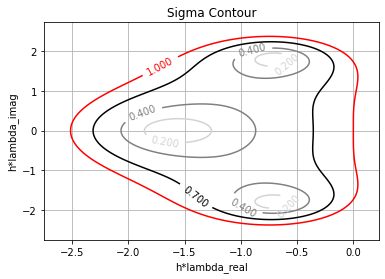

In [121]:
#draw sigma contours for 1 and $c<1$
import matplotlib.pyplot as plt
delta = 0.025
xplot = np.arange(-2.75, 0.25, delta)
yplot = np.arange(-2.75, 2.75, delta)
X, Y = np.meshgrid(xplot, yplot)
sigma = np.abs((X+Y*1j)**3/6 + (X+Y*1j)**2/2 + X+Y*1j + 1)
fig, ax = plt.subplots()
c = [0.2,0.4,0.7]
CS = ax.contour(X, Y, sigma, [*c,1.0], colors=('lightgray','gray','black','red'))
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Sigma Contour')
ax.xaxis.grid(True, zorder=0)
ax.yaxis.grid(True, zorder=0)
ax.set_xlabel('h*lambda_real')
ax.set_ylabel('h*lambda_imag')

(d)
figure above$\implies$

(c)

$-2.5<h\lambda<0 \mid \lambda \in  \mathbb{R} $

$-1.75i<h\lambda<+1.75i \mid \lambda \in  \mathbb{C}, \lambda_{real}=0$  

<h1> question 26 <h1>

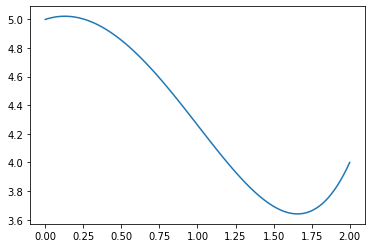

In [123]:
#(i) & (ii)
import numpy as np
import matplotlib.pyplot as plt

def a(x):
    return -(x+3)/(x+1)
def b(x):
    return (x+3)/(x+1)**2
def f(x):
    return 2*(x+1) + 3*b(x)
def step(x,s,t,h):
    k1t = h*s
    k1s = h*(-a(x)*s-b(x)*t+f(x))
    k2t = h*(s+k1s/2)
    k2s = h*(-a(x+h/2)*(s+k1s/2)-b(x+h/2)*(t+k1t/2)+f(x+h/2))
    k3t = h*(s+k2s/2)
    k3s = h*(-a(x+h/2)*(s+k2s/2)-b(x+h/2)*(t+k2t/2)+f(x+h/2))
    k4t = h*(s+k3s)
    k4s = h*(-a(x+h)*(s+k3s)-b(x+h)*(t+k3t)+f(x+h))
    return [t + 1/6*k1t + 1/3*(k2t+k3t) + 1/6*k4t\
           ,s + 1/6*k1s + 1/3*(k2s+k3s) + 1/6*k4s]

tA = 5; tB = 4
start = 0; finish = 2; dx = 0.02
n = int((finish-start)/dx)
x = np.linspace(start,finish,n);
t1 = np.empty(n); t2 = np.empty(n); s1 = np.empty(n); s2 = np.empty(n)

t1[0] = tA; t2[0] = tA
s1[0] = 50; s2[0] = -28 #guess
#while(np.abs(s1[0]-s2[0])>1):
#for k in range(5):
while(np.abs(t2[-1]-tB)>1e-6):
    for i in range(n-1):
        t1[i+1],s1[i+1] = step(x[i],s1[i],t1[i],dx)
        t2[i+1],s2[i+1] = step(x[i],s2[i],t2[i],dx)
    new_guess = s2[0] - (t2[-1]-tB) * (s2[0]-s1[0]) / (t2[-1]-t1[-1])
    s1[0] = s2[0]
    s2[0] = new_guess

plt.plot(x,t2)

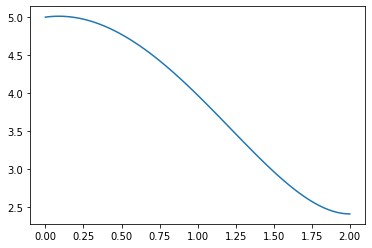

In [183]:
#(iii)
t1 = np.ones(n); t2 = np.ones(n); s1 = np.ones(n); s2 = np.ones(n)
t1[0] = tA; t2[0] = tA
s1[0] = 50; s2[0] = -28 #guess
while(np.abs(s2[-1])>1e-6):
    for i in range(n-1):
        t1[i+1],s1[i+1] = step(x[i],s1[i],t1[i],dx)
        t2[i+1],s2[i+1] = step(x[i],s2[i],t2[i],dx)
    new_guess = s2[0] - s2[-1] * (s2[0]-s1[0]) / (s2[-1]-s1[-1])
    s1[0] = s2[0]
    s2[0] = new_guess

plt.plot(x,t2)